# Import the required libraries

In [99]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# import necessary libraries

# Data
import pandas as pd
import numpy as np
# import missingno as msno

# visuallization
import matplotlib.pyplot as plt
# import missingno as msno
import seaborn as sns

#Machine Learning
## model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
## tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import Scaling Model
from sklearn.preprocessing import StandardScaler ## All features have a normal distribution of 0 mean and 1 variance.
from sklearn.preprocessing import MinMaxScaler ## Makes all features have data values between 0 and 1.
from sklearn.preprocessing import MaxAbsScaler ## Makes the absolute value of all features lie between 0 and 1.
from sklearn.preprocessing import RobustScaler
## RobustScaler is similar to StandardScaler.
## However, StandardScaler uses mean and variance, while RobustScaler uses median and quartile.
from sklearn.preprocessing import Normalizer
## The previous four methods use statistics for each feature.

# read the data

In [100]:
df = pd.read_csv("exams.csv")

In [101]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some high school,free/reduced,none,57,76,69
1,male,group D,high school,free/reduced,none,39,40,40
2,female,group C,some college,standard,none,66,67,66
3,female,group E,high school,standard,none,61,73,74
4,male,group A,some high school,standard,none,48,44,45


# check for null values

In [102]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### DataFrame haven't any missing(null) values

# minimum, maximum, mean, median, mode, standard deviation etc

In [103]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.476000,69.584000,68.480000
std,15.249064,14.447688,15.228575
min,12.000000,15.000000,20.000000
25%,56.000000,60.000000,58.000000
50%,67.000000,70.000000,68.500000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


# total marks
-Total marks (for a student) = sum of the marks/scores in the 3 examinaion for a particular student.

-Percentage marks (for a student) = Total obtained marks divided by total marks, multiplied by 100.

In [104]:
df["Total marks"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = df["Total marks"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667
2,female,group C,some college,standard,none,66,67,66,199,66.333333
3,female,group E,high school,standard,none,61,73,74,208,69.333333
4,male,group A,some high school,standard,none,48,44,45,137,45.666667


# assign grades to the marks

### Grading System:

Above 90 -> A

80 to 89 -> B

70 to 79 -> C

60 to 69 -> D

50 to 59 -> E

less than 50 -> F ( means Fail)

Considering 50 as pass marks

In [105]:
def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 60:
        grade = 'D'
    elif marks >= 50:
        grade = 'E'
    else:
        grade = 'F'
    return grade
        
        
df["Grade_math"] = df["math score"].apply(lambda s: Grade(s))
df["Grade_reading"] = df["reading score"].apply(lambda s: Grade(s))
df["Grade_writing"] = df["writing score"].apply(lambda s: Grade(s))
df["Overall_grade"] = df["Percentage"].apply(lambda s: Grade(s))
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333,E,C,D,D
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667,F,F,F,F
2,female,group C,some college,standard,none,66,67,66,199,66.333333,D,D,D,D
3,female,group E,high school,standard,none,61,73,74,208,69.333333,D,C,C,D
4,male,group A,some high school,standard,none,48,44,45,137,45.666667,F,F,F,F


# visualizing the data

### Maths Score:

<Axes: xlabel='math score', ylabel='count'>

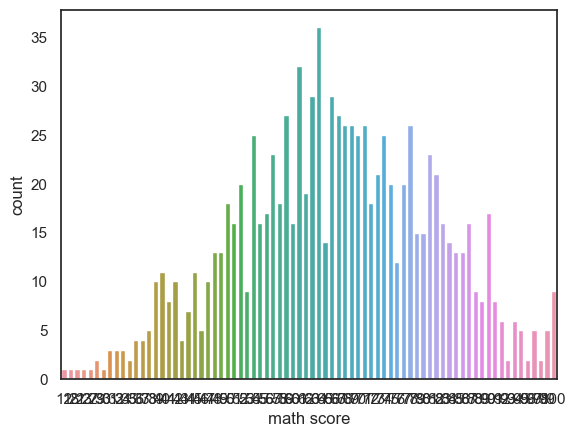

In [106]:
sns.set(style = "white")
sns.countplot(x = "math score", data = df)

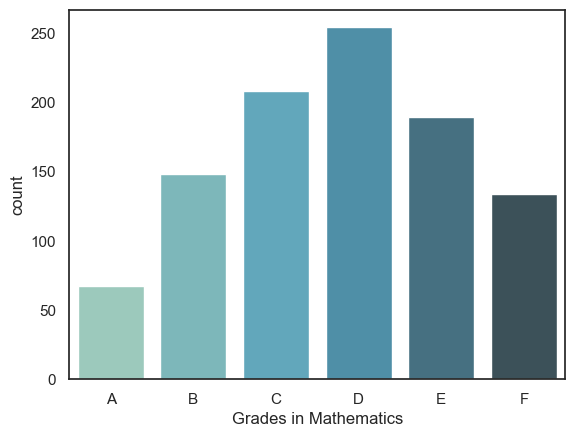

In [107]:
order_grade = ["A","B","C","D","E","F"]
sns.countplot(x = "Grade_math", data = df, order = order_grade, palette = "GnBu_d")
_ = plt.xlabel("Grades in Mathematics")

### Reading Score:

<Axes: xlabel='reading score', ylabel='count'>

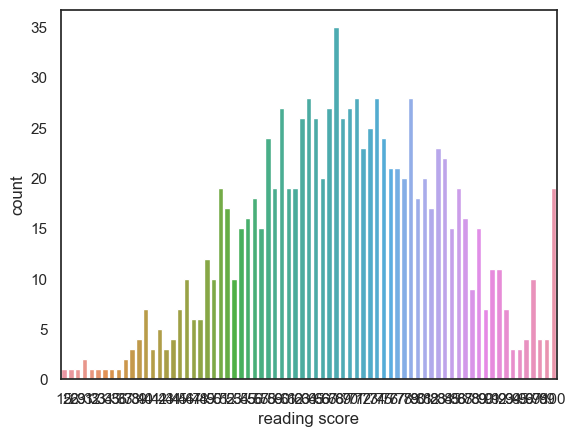

In [108]:
sns.countplot(x = "reading score", data = df)

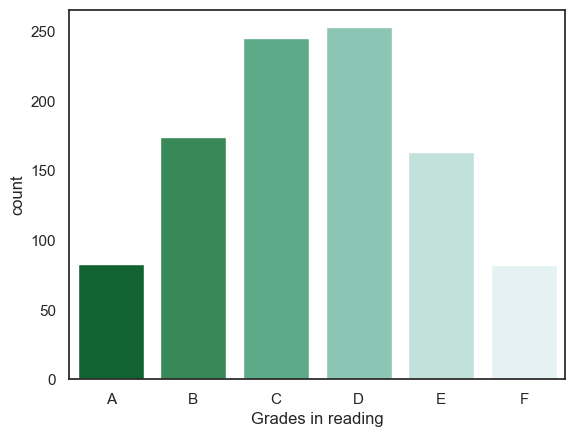

In [109]:
sns.countplot(x= "Grade_reading",data = df, order = order_grade, palette = "BuGn_r")
_ = plt.xlabel("Grades in reading")

### Writing Score:

<Axes: xlabel='writing score', ylabel='count'>

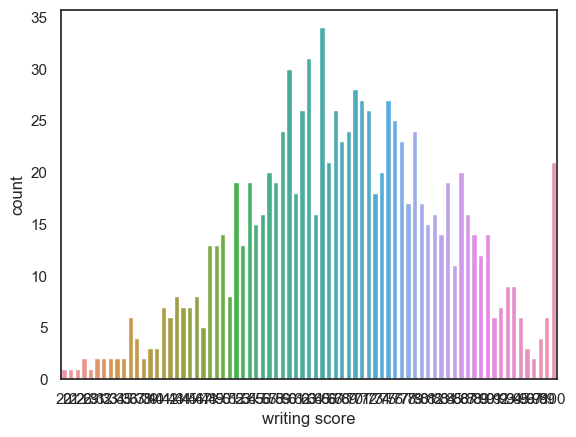

In [110]:
sns.countplot(x = "writing score", data = df)

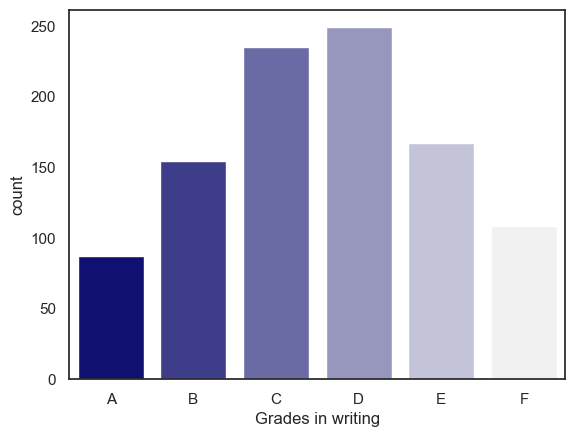

In [111]:
sns.countplot(x = "Grade_writing", data = df, order = order_grade, palette = sns.light_palette("navy", reverse=True))
_ = plt.xlabel("Grades in writing")

### Overall score

<Axes: xlabel='Percentage', ylabel='count'>

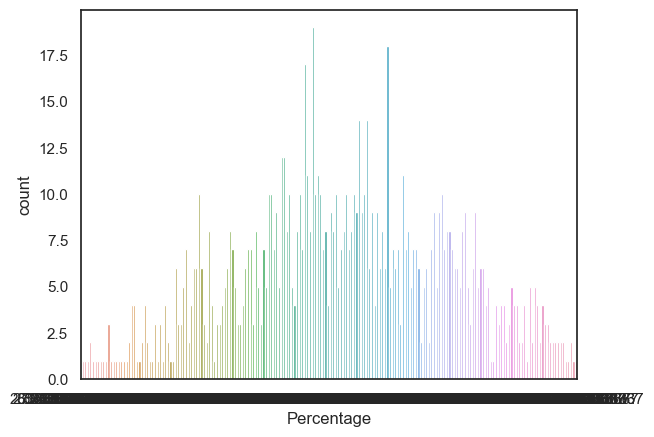

In [112]:
sns.countplot(x = "Percentage", data = df)

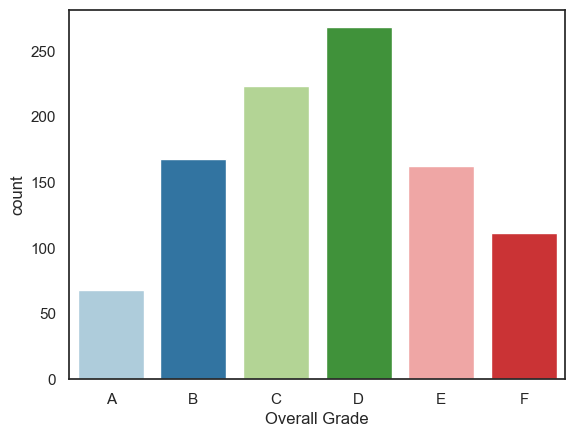

In [113]:
sns.countplot(x = 'Overall_grade', order = order_grade, data = df, palette = 'Paired')
_ = plt.xlabel("Overall Grade")

# correlation

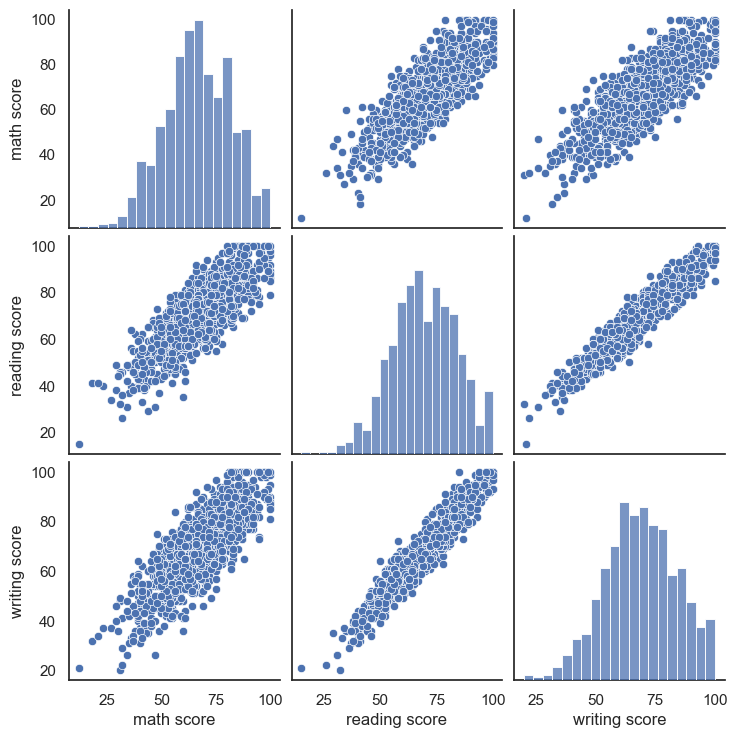

In [114]:
# Pair plot of scores and factors
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'],kind='scatter')
plt.show()


### reading score and writing score are related

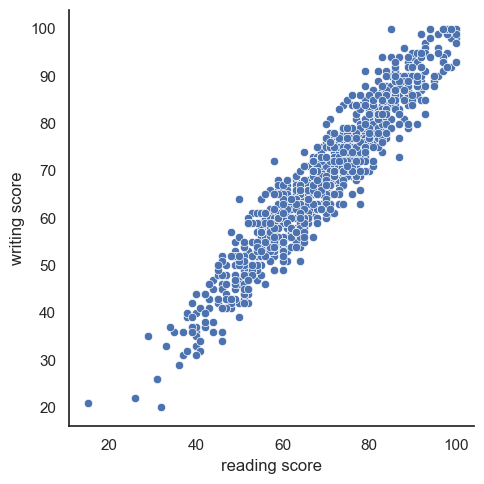

In [115]:
sns.relplot(x='reading score', y = 'writing score', data = df)

#### reading score and writing score are linearly related

In [116]:
r = np.corrcoef(df["reading score"], df["writing score"])[0, 1]
print(r)

0.9535345237579097


# influence of different factors on students performance

### gender

<Axes: xlabel='gender', ylabel='Percentage'>

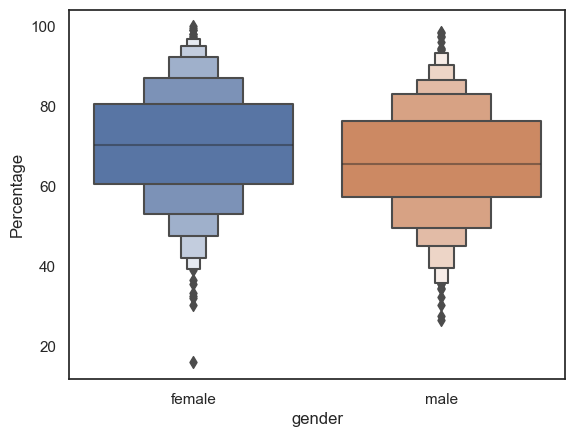

In [117]:
sns.boxenplot(x="gender", y="Percentage", data=df)

<Axes: xlabel='gender', ylabel='Percentage'>

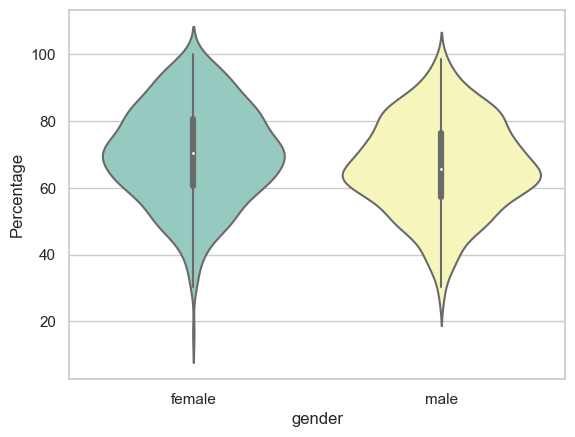

In [118]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'gender', y = 'Percentage', data = df, palette = "Set3")

<Axes: xlabel='gender', ylabel='count'>

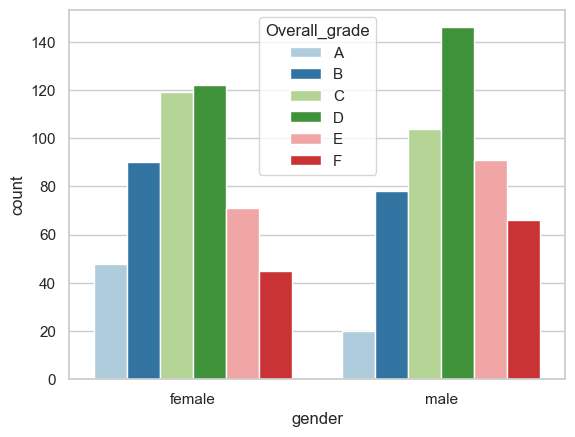

In [119]:
sns.countplot(x = "gender", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

### Race / Ethnicity:

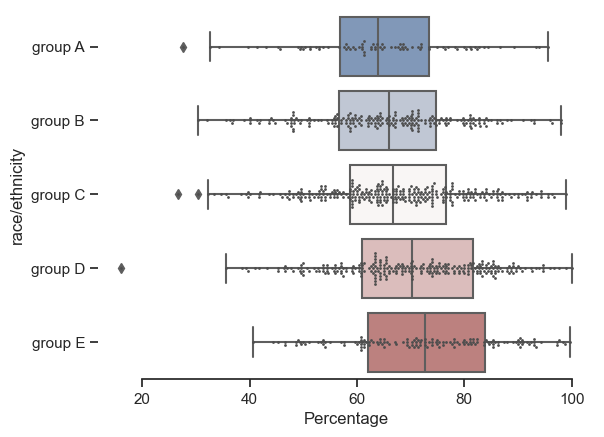

In [120]:
sns.set(style = "ticks")
order_race = ["group A","group B", "group C", "group D", "group E"]
sns.boxplot(x = "Percentage", y = "race/ethnicity", data = df, palette = "vlag", order = order_race)
sns.swarmplot(x = "Percentage", y = "race/ethnicity", data = df, size = 2, color = ".3", linewidth = 0, order = order_race)
sns.despine(trim = True, left = True)

<Axes: xlabel='race/ethnicity', ylabel='Percentage'>

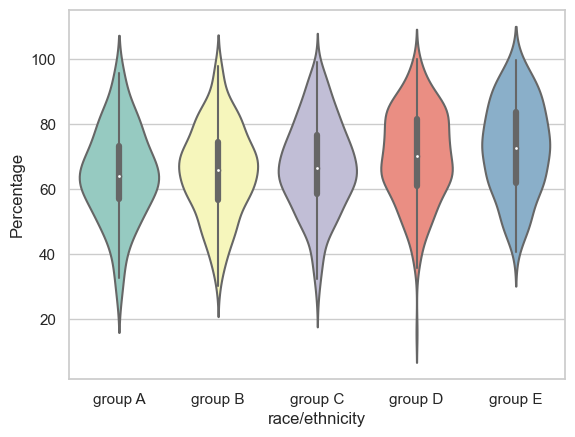

In [121]:
sns.set(style = "whitegrid")
sns.violinplot(x= 'race/ethnicity', y = 'Percentage', data = df, palette = "Set3", order = order_race)

#### students of group E are scored very well among the ethnicity groups

### Lunch:

<Axes: xlabel='lunch', ylabel='Percentage'>

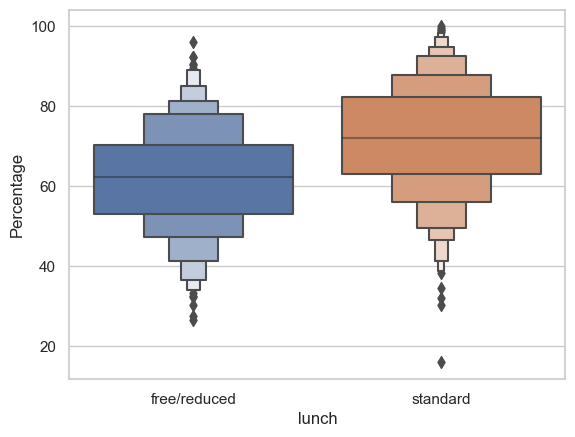

In [122]:
sns.boxenplot(x="lunch", y="Percentage", data=df)

#### students with standard lunch scored better than the others

In [123]:
# sns.countplot(x = "lunch", data = df, hue = "Overall_grade", hue_order = ["A","B","C","D","E","F"], palette = "Paired")

### Test preparation course:

<Axes: xlabel='test preparation course', ylabel='Percentage'>

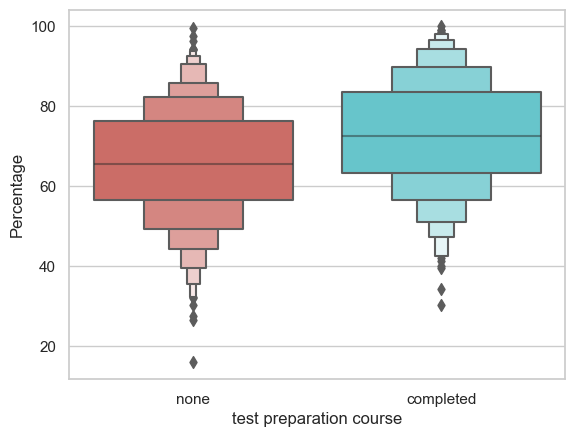

In [124]:
sns.boxenplot(x='test preparation course', y='Percentage',data = df, palette = "hls")

#### students who had completed their test preparation course scored better than the others

In [125]:
# sns.countplot(x = "test preparation course", hue = "Overall_grade",data = df, hue_order = order_grade, palette = 'Paired')
# _ = plt.legend()

### Parental level of education:

In [126]:
# order_edu = ['some high school','high school',"associate's degree","some college","bachelor's degree","master's degree"]
# p = sns.countplot(x='parental level of education', hue='Overall_grade',data=df, order= order_edu, hue_order = order_grade, palette = 'Paired')
# _ = plt.xlabel('Parents level of education')
# _ = plt.setp(p.get_xticklabels(), rotation = 60)

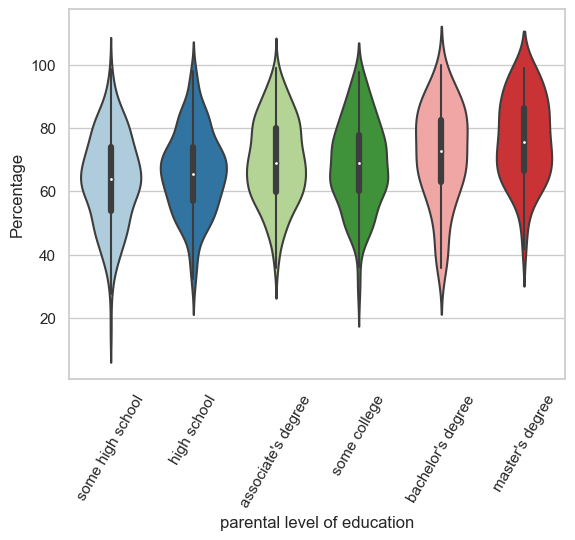

In [127]:
q = sns.violinplot(x="parental level of education", y="Percentage", data = df, order = order_edu,palette = "Paired")
_ = plt.setp(q.get_xticklabels(), rotation = 60)

#### the student's whose parents have master's degree performed better than others

# Distribution of scores by column for each test score

In [128]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']

score_column = ["math score","reading score","writing score","Percentage"]
def bias_col_scr(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(20,8))
    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
        for value in df[feature].value_counts().index:
            sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
        ax[row][col].legend()
        ax[row][col].set_title("distribution of <"+scr_type+"> by |-"+feature)

    plt.show()

<< math score >>


C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\183612

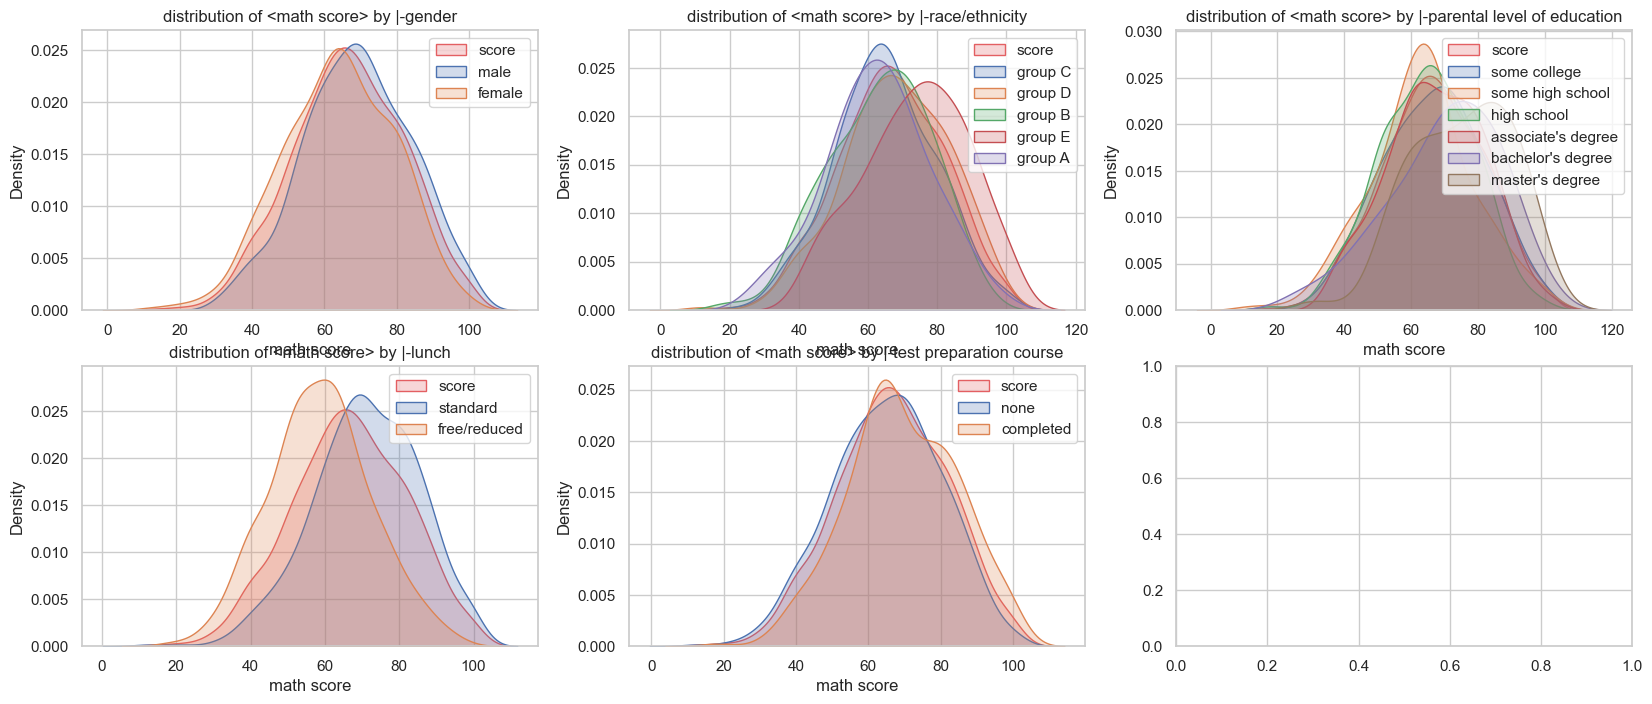

<< reading score >>


C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\183612

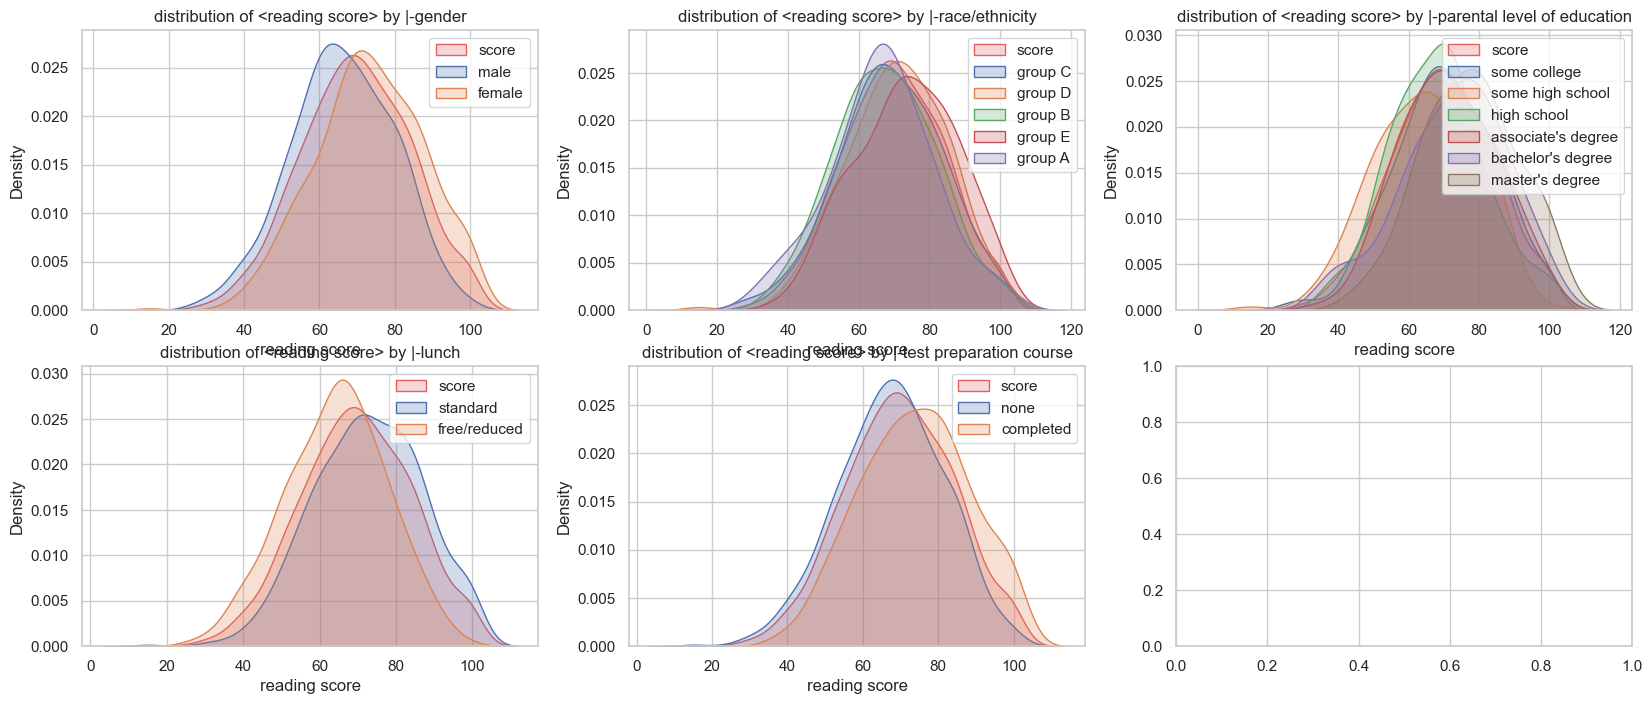

<< writing score >>


C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\183612

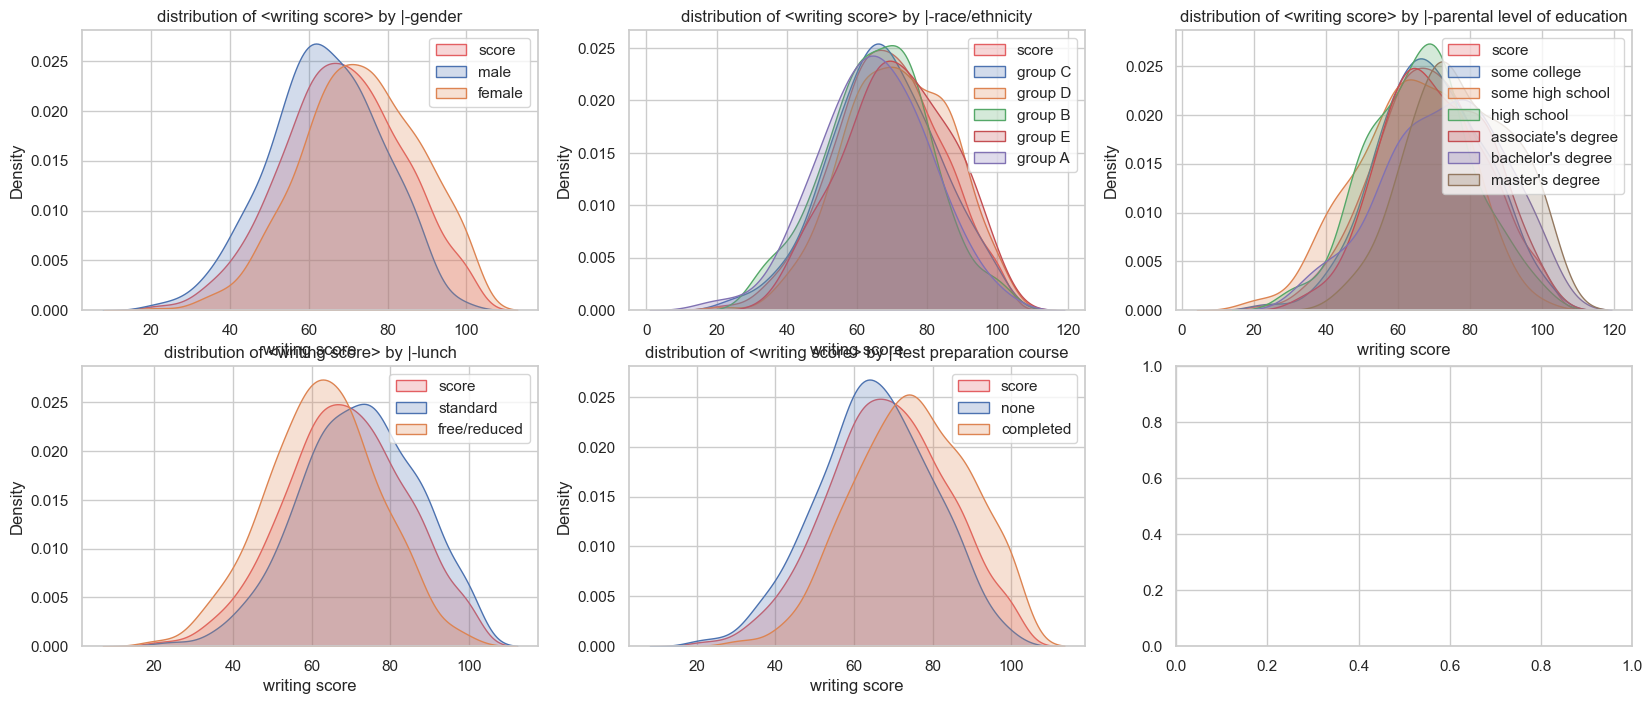

<< Percentage >>


C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[scr_type], color='#e35f62', shade=True, label="score", ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\1836122977.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df[feature] == value][scr_type], shade=True, label=value, ax=ax[row][col])
C:\Users\sahar\AppData\Local\Temp\ipykernel_12056\183612

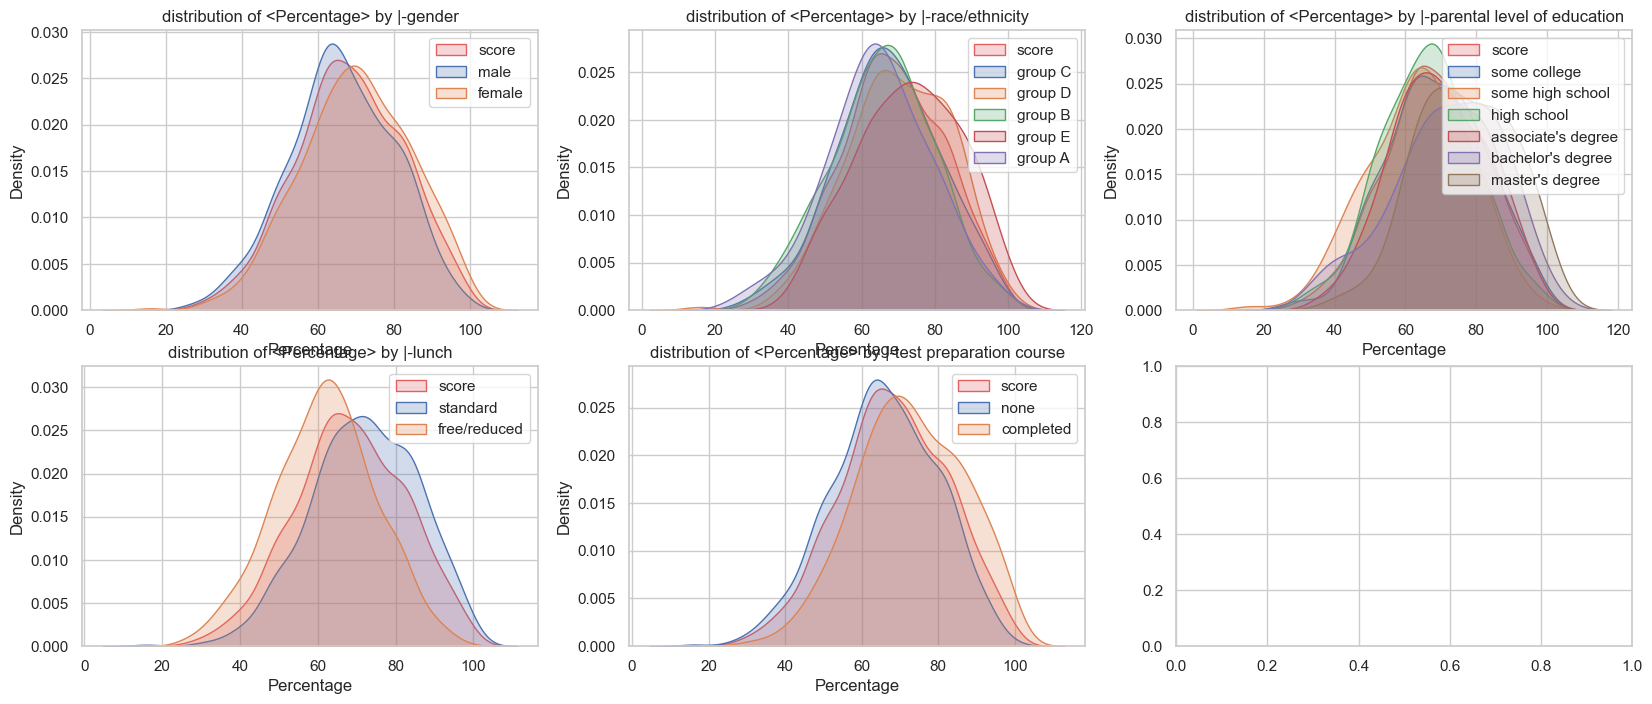

In [129]:
for i in score_column:
    print("<<",i,">>")
    bias_col_scr(i)

# Analysis and visualization of score types for each column

<< math score >>

< gender >
male :  69.00990099009901
female :  63.89090909090909

< race/ethnicity >
group C :  64.80794701986756
group D :  68.15891472868218
group B :  63.42790697674418
group E :  73.72027972027972
group A :  62.68292682926829

< parental level of education >
some college :  66.63346613545816
some high school :  63.03517587939699
high school :  64.29591836734694
associate's degree :  67.37362637362638
bachelor's degree :  69.8425925925926
master's degree :  75.0

< lunch >
standard :  71.0095087163233
free/reduced :  58.72357723577236

< test preparation course >
none :  64.99241274658574
completed :  69.34310850439883


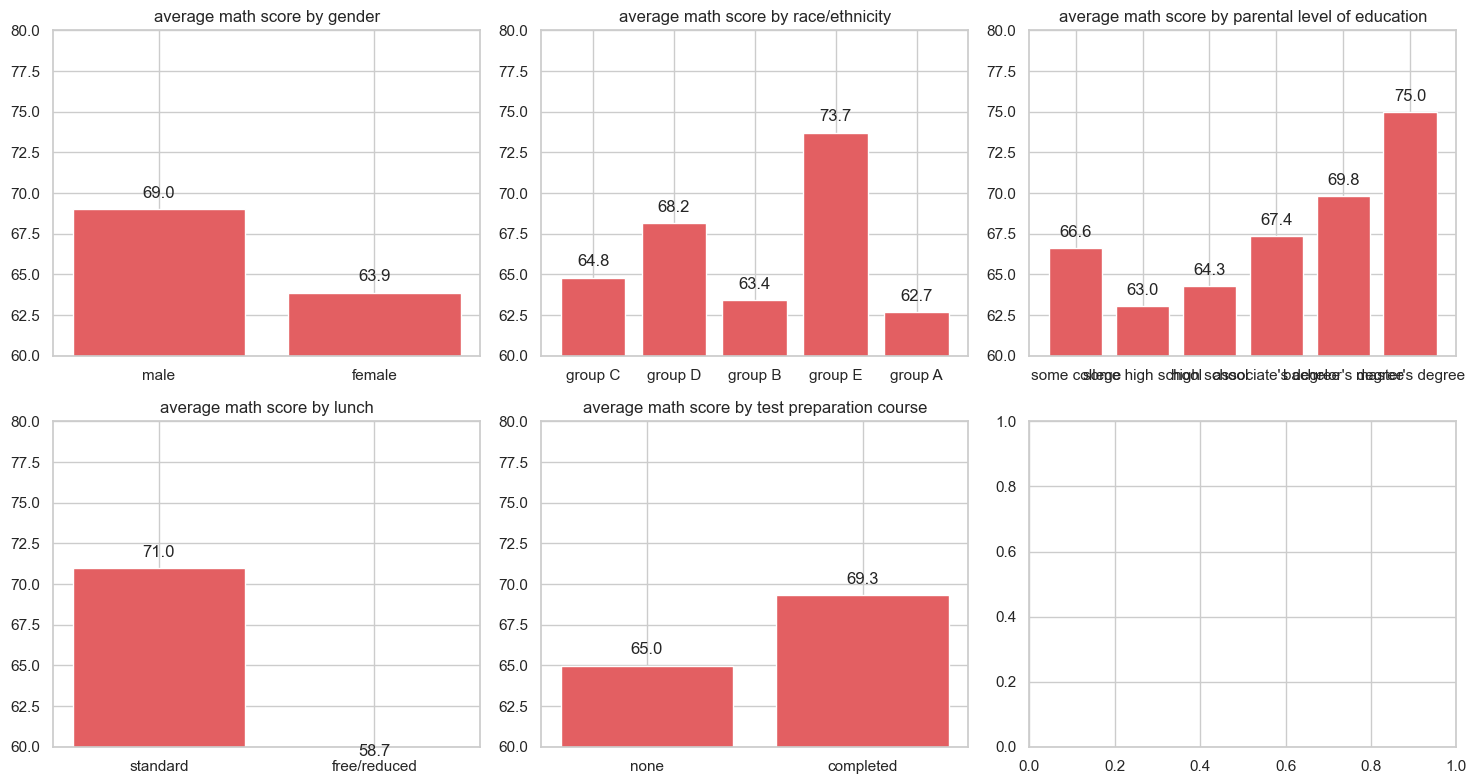

<< reading score >>

< gender >
male :  66.09306930693069
female :  73.14545454545454

< race/ethnicity >
group C :  68.94039735099338
group D :  70.94186046511628
group B :  67.52558139534884
group E :  73.34965034965035
group A :  66.51219512195122

< parental level of education >
some college :  70.19123505976096
some high school :  64.92462311557789
high school :  67.97448979591837
associate's degree :  71.06593406593407
bachelor's degree :  72.68518518518519
master's degree :  77.171875

< lunch >
standard :  72.67036450079239
free/reduced :  64.30623306233062

< test preparation course >
none :  67.40060698027314
completed :  73.80351906158357


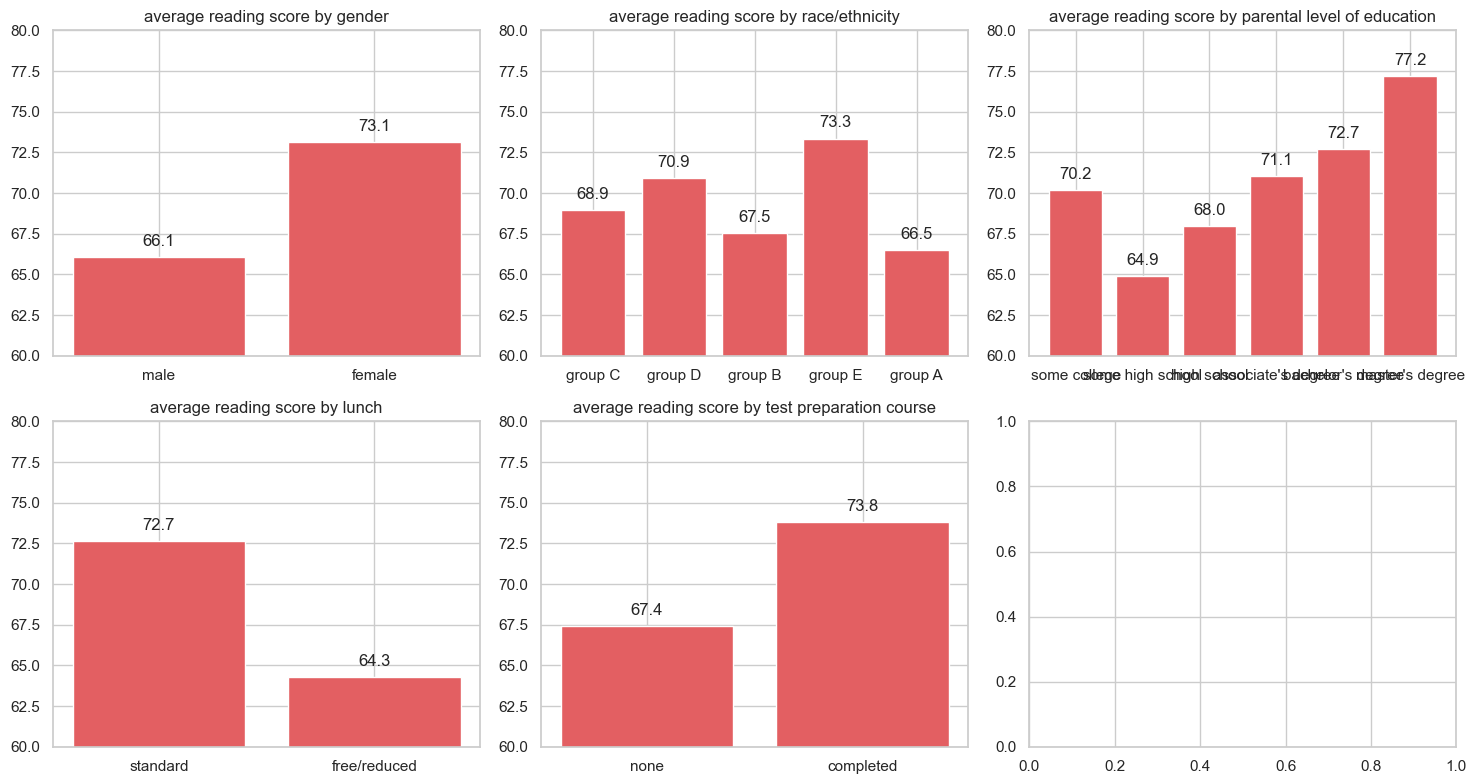

<< writing score >>

< gender >
male :  64.02178217821782
female :  73.02828282828283

< race/ethnicity >
group C :  67.52317880794702
group D :  71.46511627906976
group B :  65.76744186046511
group E :  71.32867132867133
group A :  64.7560975609756

< parental level of education >
some college :  69.12350597609561
some high school :  63.2713567839196
high school :  65.93367346938776
associate's degree :  70.43406593406593
bachelor's degree :  72.46296296296296
master's degree :  77.671875

< lunch >
standard :  71.8621236133122
free/reduced :  62.696476964769644

< test preparation course >
none :  65.23975720789075
completed :  74.74193548387096


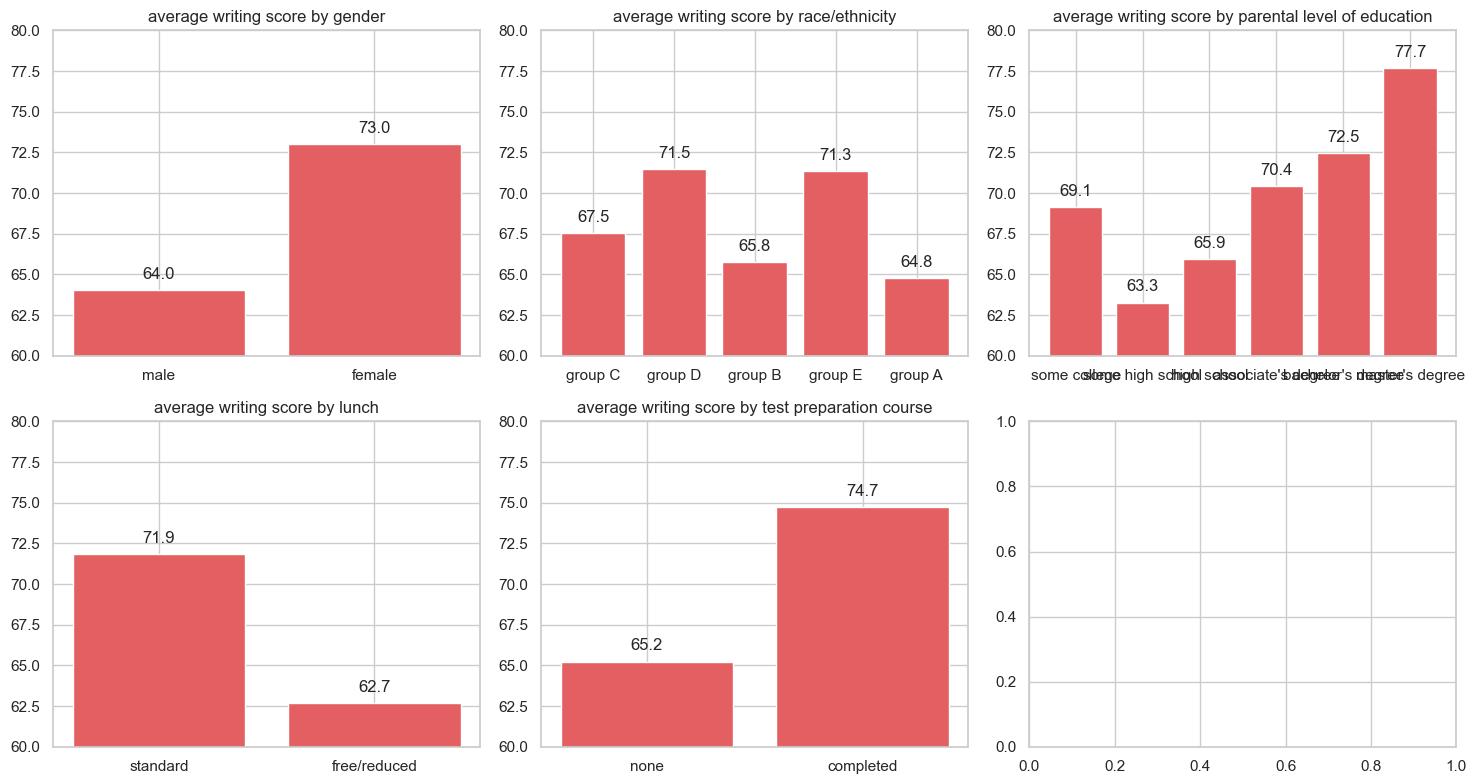

<< Percentage >>

< gender >
male :  66.37491749174916
female :  70.02154882154882

< race/ethnicity >
group C :  67.09050772626931
group D :  70.18863049095607
group B :  65.57364341085271
group E :  72.79953379953379
group A :  64.65040650406505

< parental level of education >
some college :  68.64940239043824
some high school :  63.743718592964825
high school :  66.06802721088435
associate's degree :  69.62454212454213
bachelor's degree :  71.66358024691358
master's degree :  76.61458333333334

< lunch >
standard :  71.8473322768093
free/reduced :  61.90876242095755

< test preparation course >
none :  65.87759231158321
completed :  72.6295210166178


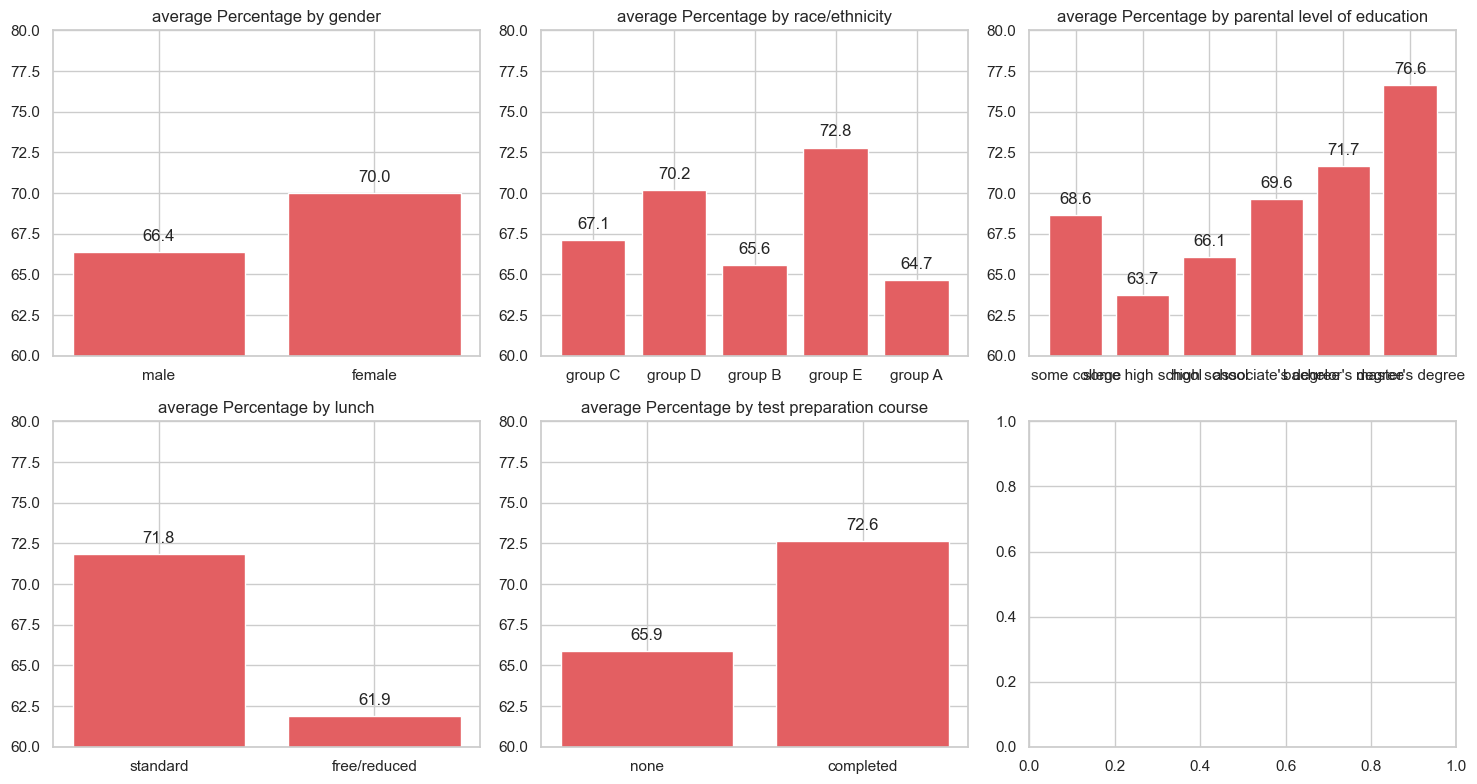

In [130]:
features = ["gender","race/ethnicity","parental level of education","lunch",'test preparation course']


def bias_col_scr_2(scr_type):
    fig, ax = plt.subplots(2, 3, figsize=(15,8))
    ax = ax.flatten()
    for i, feature in enumerate(features):
        print("")
        print("<",feature,">")
        x = []
        y = []
        for j in df[feature].value_counts().index:
            print(j, ": ", np.mean(df[df[feature]==j][scr_type].values))
            x.append(j)
            y.append(np.mean(df[df[feature]==j][scr_type].values))
        plt.sca(ax[i])
        plt.bar(x, y, color='#e35f62')
        for b in range(len(x)):
            height = y[b]
            plt.text(x[b], height + 0.5, '%.1f' % height, ha='center', va='bottom', size=12)
        plt.ylim(60, 80)
        plt.title("average "+scr_type+" by "+feature)
    plt.tight_layout()
    plt.show()
for i in score_column:
    print("<<",i,">>")
    bias_col_scr_2(i)

# Check correlation with HeatMap

In [131]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage,Grade_math,Grade_reading,Grade_writing,Overall_grade
0,female,group D,some high school,free/reduced,none,57,76,69,202,67.333333,E,C,D,D
1,male,group D,high school,free/reduced,none,39,40,40,119,39.666667,F,F,F,F
2,female,group C,some college,standard,none,66,67,66,199,66.333333,D,D,D,D
3,female,group E,high school,standard,none,61,73,74,208,69.333333,D,C,C,D
4,male,group A,some high school,standard,none,48,44,45,137,45.666667,F,F,F,F


In [136]:
data = df[['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score',
 'Total marks',
 'Percentage',]].copy()


# gender
sex_mapping = {"male":0,"female":1}

#race/ethnicity
group_mapping = {"group A":0.2,"group B":0.4,"group C":0.6,"group D":0.8,"group E":1}

#parental level of education
degree_mapping = {"some college":0.4,
                  "associate's degree":0.6,
                  "high school":0,
                  "some high school":0.2,
                  "bachelor's degree":0.8,
                  "master's degree":1}

# lunch
lunch_mapping = {"standard":1,
                "free/reduced":0}

# test preparation course
course_mapping = {"none":0,
                 "completed":1}



data["gender"] = data["gender"].map(sex_mapping)
data["race/ethnicity"] = data["race/ethnicity"].map(group_mapping)
data["parental level of education"] = data["parental level of education"].map(degree_mapping)
data["lunch"] = data["lunch"].map(lunch_mapping)
data["test preparation course"] = data["test preparation course"].map(course_mapping)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Percentage
0,1,0.8,0.2,0,0,57,76,69,202,67.333333
1,0,0.8,0.0,0,0,39,40,40,119,39.666667
2,1,0.6,0.4,1,0,66,67,66,199,66.333333
3,1,1.0,0.0,1,0,61,73,74,208,69.333333
4,0,0.2,0.2,1,0,48,44,45,137,45.666667


In [137]:
# d_m = []
# d_r = []
# d_w = []
# d_s = []
# for i in range(len(df)):
#     d_m.append(df['math score'].values[i]/100)
#     d_r.append(df['reading score'].values[i]/100)
#     d_w.append(df['writing score'].values[i]/100)
#     d_s.append(df['Percentage'].values[i]/100)
# data['math score'] = d_m
# data['reading score'] = d_r
# data['writing score'] = d_w
# data['Percentage'] = d_s
# data.head()

<Axes: title={'center': 'Correlation of Features'}>

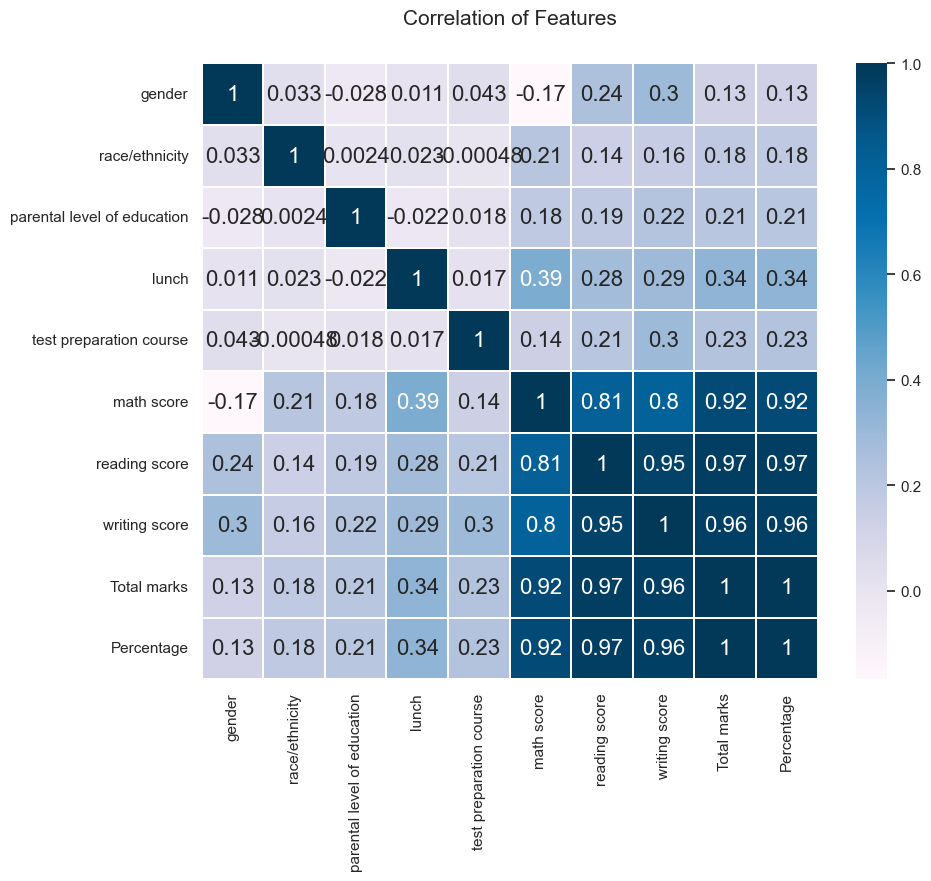

In [138]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})